# Training for Full

In [1]:
'''
Library Dependencies
'''
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
'''
Hyper Parameters
'''
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20

In [2]:
'''
Confusion Matrix Plotting 
'''

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
'''
Dataset: CIFAR10
'''

# he CIFAR10 Dataset contains 60000 images split equally among 10 classes. 
# 50000 for training, 10000 as a test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
'''
Classifier: CIFAR10
'''
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
'''
Train the Classifer
'''
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

historyFull = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, \
                        validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 284s 6ms/sample - loss: 1.8297 - acc: 0.3289 - val_loss: 1.4999 - val_acc: 0.4652
Epoch 2/50
50000/50000 [==============================] - 286s 6ms/sample - loss: 1.4897 - acc: 0.4608 - val_loss: 1.3736 - val_acc: 0.5131
Epoch 3/50
50000/50000 [==============================] - 287s 6ms/sample - loss: 1.3622 - acc: 0.5132 - val_loss: 1.2541 - val_acc: 0.5499
Epoch 4/50
50000/50000 [==============================] - 288s 6ms/sample - loss: 1.2631 - acc: 0.5506 - val_loss: 1.1709 - val_acc: 0.5841
Epoch 5/50
50000/50000 [==============================] - 284s 6ms/sample - loss: 1.1850 - acc: 0.5810 - val_loss: 1.0966 - val_acc: 0.6111
Epoch 6/50
50000/50000 [==============================] - 289s 6ms/sample - loss: 1.1172 - acc: 0.6048 - val_loss: 1.0381 - val_acc: 0.6327
Epoch 7/50
50000/50000 [==============================] - 286s 6ms/sample - loss: 0.8883 - acc: 0.6902 - val_l

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


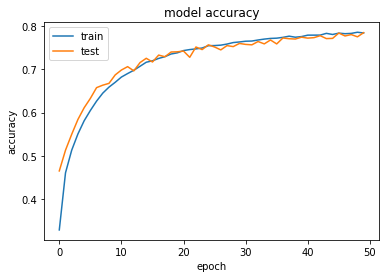

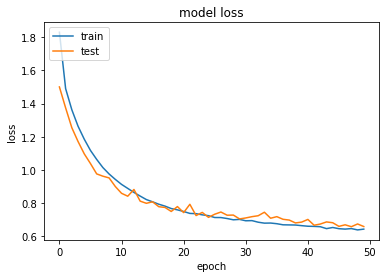

In [10]:
'''
Train/Test Performance: Full Dataset
'''
print(historyFull.history.keys())

# summarize history for accuracy
plt.plot(historyFull.history['acc'])
plt.plot(historyFull.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historyFull.history['loss'])
plt.plot(historyFull.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.set_printoptions(precision=2)

class_names = [0,1 ...]

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Itentional Dataset Imbalance -- Undersampling: Training and Prediction 

In [11]:
undersample_path = '../sampling/undersample/' 

In [12]:
class_under_study = '9'
level_of_imbalance = '0.1'

In [13]:
x_train_sub = np.load(undersample_path + 'X' + class_under_study + 'Prop' + level_of_imbalance + '.npy')
y_train_sub = np.load(undersample_path + 'Y' + class_under_study + 'Prop' + level_of_imbalance + '.npy')
print('x_train_sub shape:', x_train_sub.shape)
print(x_train_sub.shape[0], 'train samples')

#Convert class vectors to binary class matrices.
y_train_sub = keras.utils.to_categorical(y_train_sub, num_classes)

x_train_sub shape: (45500, 32, 32, 3)
45500 train samples


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train_sub = x_train_sub.astype('float32')
x_train_sub /= 255

historySub = model.fit(x_train_sub, y_train_sub, batch_size=batch_size, epochs=epochs, \
                       validation_data=(x_test, y_test), shuffle=True)

Train on 45500 samples, validate on 10000 samples
Epoch 1/50
45500/45500 [==============================] - 234s 5ms/sample - loss: 0.6480 - acc: 0.7813 - val_loss: 0.7096 - val_acc: 0.7667
Epoch 2/50
45500/45500 [==============================] - 233s 5ms/sample - loss: 0.6391 - acc: 0.7846 - val_loss: 0.7276 - val_acc: 0.7646
Epoch 3/50
45500/45500 [==============================] - 235s 5ms/sample - loss: 0.6388 - acc: 0.7847 - val_loss: 0.7163 - val_acc: 0.7640
Epoch 4/50
45500/45500 [==============================] - 232s 5ms/sample - loss: 0.6374 - acc: 0.7876 - val_loss: 0.6614 - val_acc: 0.7804
Epoch 5/50
45500/45500 [==============================] - 234s 5ms/sample - loss: 0.6390 - acc: 0.7851 - val_loss: 0.6684 - val_acc: 0.7776
Epoch 6/50
45500/45500 [==============================] - 231s 5ms/sample - loss: 0.6405 - acc: 0.7861 - val_loss: 0.6908 - val_acc: 0.7747
Epoch 7/50
45500/45500 [==============================] - 237s 5ms/sample - loss: 0.6328 - acc: 0.7881 - val_l

In [ ]:
# list all data in history
print(historySub.history.keys())
# summarize history for accuracy
plt.plot(historySub.history['accuracy'])
plt.plot(historySub.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historySub.history['loss'])
plt.plot(historySub.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Baseline 1 -- Oversampling: Training and Prediction

In [75]:
oversample_path = './Data/OverSamples/'

In [76]:
x_oversample = np.load(oversample_path + 'X0Prop0.1OverSample.npy')
y_oversample = np.load(oversample_path + 'Y0Prop0.1OverSample.npy')
print('x_oversample shape:', x_oversample.shape)
print(x_oversample.shape[0], 'oversample samples')

#Convert class vectors to binary class matrices.
y_oversample = keras.utils.to_categorical(y_oversample, num_classes)

x_oversample shape: (50000, 32, 32, 3)
50000 oversample samples


In [77]:
#Define some parameters
batch_size = 64
num_classes = 10
epochs = 30
num_predictions = 20

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_oversample = x_train_SMOTE.astype('float32')
x_oversample /= 255

historyOversample = model.fit(x_oversample, y_oversample, batch_size=batch_size, epochs=epochs, \
                              validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 102s 2ms/sample - loss: 2.2777 - accuracy: 0.1315 - val_loss: 368.8231 - val_accuracy: 0.4652
Epoch 2/30
50000/50000 [==============================] - 104s 2ms/sample - loss: 2.1119 - accuracy: 0.2282 - val_loss: 806.3529 - val_accuracy: 0.3221
Epoch 3/30
50000/50000 [==============================] - 104s 2ms/sample - loss: 2.0015 - accuracy: 0.2771 - val_loss: 1125.9380 - val_accuracy: 0.2853
Epoch 4/30
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.9158 - accuracy: 0.3147 - val_loss: 1609.2927 - val_accuracy: 0.2672
Epoch 5/30
50000/50000 [==============================] - 97s 2ms/sample - loss: 1.8358 - accuracy: 0.3445 - val_loss: 1965.2293 - val_accuracy: 0.2703
Epoch 6/30
50000/50000 [==============================] - 94s 2ms/sample - loss: 1.7743 - accuracy: 0.3701 - val_loss: 2660.5546 - val_accuracy: 0.2585
Epoch 7/30
50000/50000 [=============

In [ ]:
# list all data in history
print(historyOversample.history.keys())
# summarize history for accuracy
plt.plot(historyOversample.history['accuracy'])
plt.plot(historyOversample.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyOversample.history['loss'])
plt.plot(historyOversample.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Baseline 2 -- Vanilla SMOTE: Training and Prediction

In [30]:
SMOTE_path = './Data/SMOTE/'

In [31]:
x_SMOTE = np.load(SMOTE_path + 'X0Prop0.1SMOTE.npy')
y_SMOTE = np.load(SMOTE_path + 'Y0Prop0.1SMOTE.npy')
print('x_SMOTE shape:', x_SMOTE.shape)
print(x_SMOTE.shape[0], 'SMOTE samples')

#Convert class vectors to binary class matrices.
y_SMOTE = keras.utils.to_categorical(y_SMOTE, num_classes)

x_train_SMOTE shape: (50000, 32, 32, 3)
50000 SMOTE samples


In [32]:
#Define some parameters
batch_size = 64
num_classes = 10
epochs = 30
num_predictions = 20

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_SMOTE = x_SMOTE.astype('float32')
x_SMOTE /= 255

historySmote = model.fit(x_SMOTE, y_SMOTE, batch_size=batch_size, epochs=epochs, \
                         validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.8607 - accuracy: 0.3180 - val_loss: 282.9512 - val_accuracy: 0.2536
Epoch 2/30
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.5048 - accuracy: 0.4544 - val_loss: 854.2117 - val_accuracy: 0.1124
Epoch 3/30
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.3558 - accuracy: 0.5130 - val_loss: 809.6736 - val_accuracy: 0.1202
Epoch 4/30
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.2690 - accuracy: 0.5451 - val_loss: 309.8233 - val_accuracy: 0.3205
Epoch 5/30
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.2008 - accuracy: 0.5720 - val_loss: 346.5931 - val_accuracy: 0.2944
Epoch 6/30
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.1517 - accuracy: 0.5930 - val_loss: 508.0419 - val_accuracy: 0.2122
Epoch 7/30
50000/50000 [====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


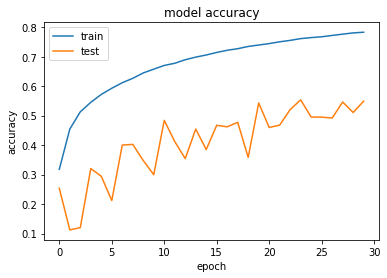

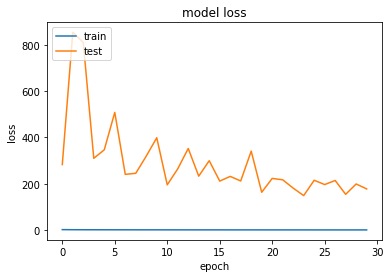

In [35]:
# list all data in history
print(historySmote.history.keys())
# summarize history for accuracy
plt.plot(historySmote.history['accuracy'])
plt.plot(historySmote.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historySmote.history['loss'])
plt.plot(historySmote.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Baseline 3 -- Adaptive Synthesis: Training and prediction

In [68]:
ADASYN_path = './Data/ADASYN/'

In [69]:
x_ADASYN = np.load(ADASYN_path + 'X0Prop0.1ADASYN.npy')
y_ADASYN = np.load(ADASYN_path + 'Y0Prop0.1ADASYN.npy')
x_ADASYN = x_ADASYN.reshape((x_ADASYN.shape[0], 32, 32, 3))
print('x_ADASYN shape:', x_ADASYN.shape)
print(x_ADASYN.shape[0], 'ADASYN samples')

#Convert class vectors to binary class matrices.
y_ADASYN = keras.utils.to_categorical(y_ADASYN, num_classes)

x_ADASYN shape: (50126, 32, 32, 3)
50126 ADASYN samples


In [70]:
#Define some parameters
batch_size = 64
num_classes = 10
epochs = 30
num_predictions = 20

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_ADASYN = x_ADASYN.astype('float32')
x_ADASYN /= 255

historyADASYN = model.fit(x_ADASYN, y_ADASYN, batch_size=batch_size, epochs=epochs, \
                          validation_data=(x_test, y_test), shuffle=True)

Train on 50126 samples, validate on 10000 samples
Epoch 1/30
50126/50126 [==============================] - 89s 2ms/sample - loss: 46.7452 - accuracy: 0.4309 - val_loss: 127.0384 - val_accuracy: 0.5423
Epoch 2/30
50126/50126 [==============================] - 90s 2ms/sample - loss: 1.2551 - accuracy: 0.5929 - val_loss: 192.6734 - val_accuracy: 0.5356
Epoch 3/30
50126/50126 [==============================] - 90s 2ms/sample - loss: 1.0287 - accuracy: 0.6611 - val_loss: 267.2218 - val_accuracy: 0.4909
Epoch 4/30
50126/50126 [==============================] - 89s 2ms/sample - loss: 0.9207 - accuracy: 0.6923 - val_loss: 259.4790 - val_accuracy: 0.5211
Epoch 5/30
50126/50126 [==============================] - 94s 2ms/sample - loss: 0.8583 - accuracy: 0.7123 - val_loss: 224.9686 - val_accuracy: 0.5286
Epoch 6/30
50126/50126 [==============================] - 94s 2ms/sample - loss: 0.8119 - accuracy: 0.7237 - val_loss: 204.0024 - val_accuracy: 0.5584
Epoch 7/30
50126/50126 [===================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


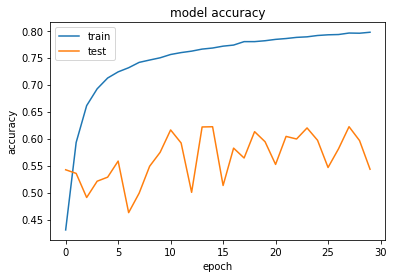

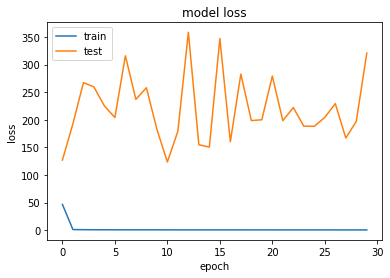

In [74]:
# list all data in history
print(historyADASYN.history.keys())
# summarize history for accuracy
plt.plot(historyADASYN.history['accuracy'])
plt.plot(historyADASYN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyADASYN.history['loss'])
plt.plot(historyADASYN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()